In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
HARPY = "harpy.co"
WESTR = "westeros.inc"

In [17]:
df = pd.read_csv('production-data.csv', delimiter=',') # Считываем данные из файла .csv, разделитель между столбцами - запятая 
df['duration'] = df['report.date'] - df['production.date'] # Создаем новый стобец Duration

max_duration = df['duration'].max()
max_month    = df['report.date'].max()
df_supplier_duration   = df.groupby(['supplier', 'duration'])
df_supplier_production = df.groupby(['supplier', 'production.date'])
df_supplier_report     = df.groupby(['supplier', 'report.date'])
df_unsullen_id         = df.groupby(['unsullen.id'])

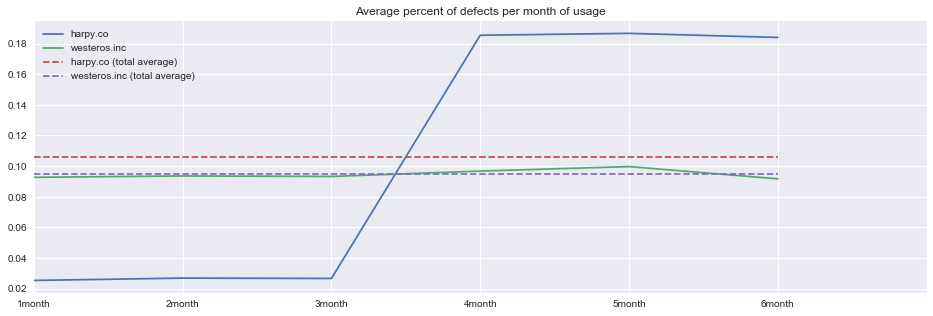

In [18]:
def get_defects_percent_month(produced, defects):
    alive_harpy = np.cumsum(np.array(produced[HARPY])) - np.cumsum(np.array(defects[HARPY]))
    alive_westr = np.cumsum(np.array(produced[WESTR])) - np.cumsum(np.array(defects[WESTR]))
    return {HARPY : defects[HARPY] / alive_harpy, WESTR : defects[WESTR] / alive_westr}

produced_mean = df_supplier_duration['produced'].mean()
defects_mean  = df_supplier_duration['defects'].mean()
defects_percent_month = get_defects_percent_month(produced_mean, defects_mean)

harpy_month = np.array(defects_percent_month[HARPY][1:])
westr_month = np.array(defects_percent_month[WESTR][1:])

harpy_all   = np.empty(harpy_month.size)
westr_all   = np.empty(westr_month.size)
harpy_all.fill(harpy_month.mean())
westr_all.fill(westr_month.mean())

df_plot = pd.DataFrame(data=(np.array([harpy_month, westr_month, harpy_all, westr_all])).transpose())
df_plot.columns = [HARPY, WESTR, HARPY + ' (total average)', WESTR + ' (total average)']

xlab = [(str(i + 1) + 'month') for i in range(0, max_duration)]
plot = df_plot.plot(kind='line', figsize=(16, 5), style=['-', '-', '--', '--'])
plot.set_xticklabels(xlab)
plot.set_xlim([0, len(xlab)])

plt.title('Average percent of defects per month of usage')
plt.show()

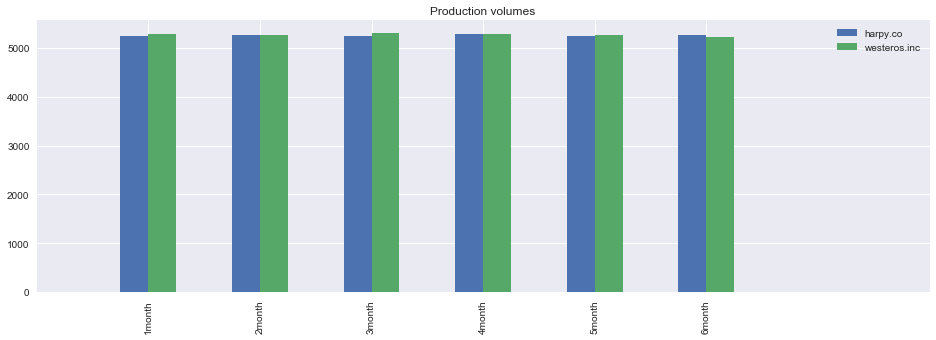

In [19]:
produced_sum = df_supplier_production['produced'].sum()
defects_sum  = df_supplier_production['defects'].sum()

df_plot = pd.DataFrame(data=(np.array([np.array(produced_sum[HARPY]), np.array(produced_sum[WESTR])])).transpose())
df_plot.columns = [HARPY, WESTR]

xlab = [(str(i + 1) + 'month') for i in range(0, max_month)]
plot = df_plot.plot(kind='bar', figsize=(16, 5))
plot.set_xticklabels(xlab)
plot.set_xlim([-1, len(xlab)])

plt.title('Production volumes')
plt.show()

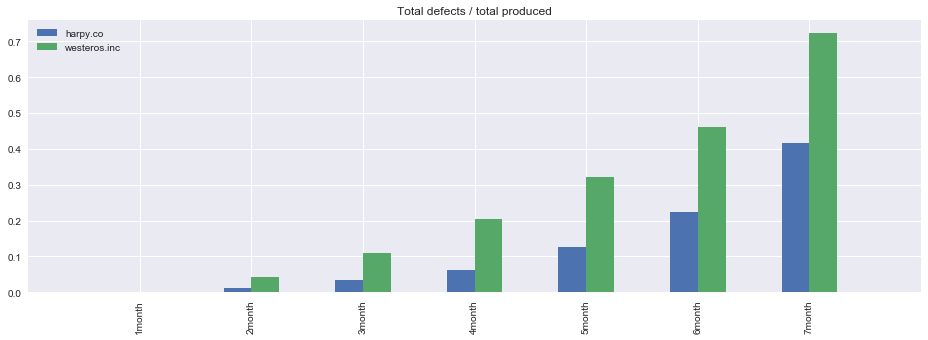

In [20]:
produced_sum = df_supplier_report['produced'].sum()
defects_sum  = df_supplier_report['defects'].sum()

defects_percent_harpy = np.cumsum(np.cumsum(np.array(defects_sum[HARPY]))) / np.cumsum(np.array(produced_sum[HARPY]))
defects_percent_westr = np.cumsum(np.cumsum(np.array(defects_sum[WESTR]))) / np.cumsum(np.array(produced_sum[WESTR]))

df_plot = pd.DataFrame(data=(np.array([defects_percent_harpy, defects_percent_westr])).transpose())
df_plot.columns = [HARPY, WESTR]

xlab = [(str(i + 1) + 'month') for i in range(0, max_month)]
plot = df_plot.plot(kind='bar', figsize=(16, 5))
plot.set_xticklabels(xlab)
plot.set_xlim([-1, len(xlab)])

plt.title('Total defects / total produced')
plt.show()

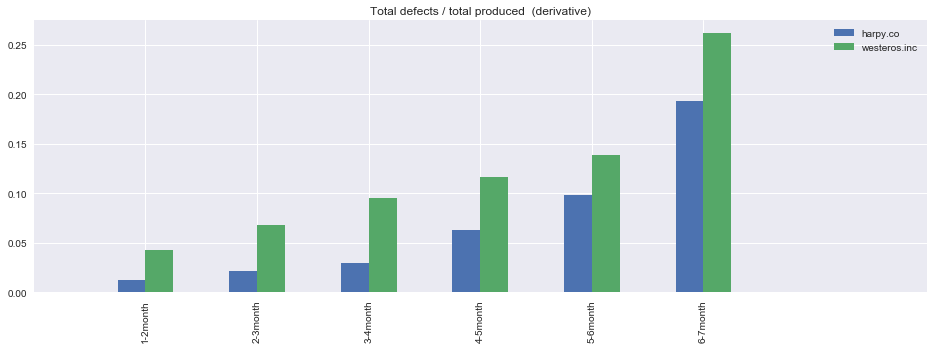

In [21]:
produced_sum = df_supplier_report['produced'].sum()
defects_sum  = df_supplier_report['defects'].sum()

defects_percent_harpy = np.diff(np.cumsum(np.cumsum(np.array(defects_sum[HARPY]))) / np.cumsum(np.array(produced_sum[HARPY])))
defects_percent_westr = np.diff(np.cumsum(np.cumsum(np.array(defects_sum[WESTR]))) / np.cumsum(np.array(produced_sum[WESTR])))

df_plot = pd.DataFrame(data=(np.array([defects_percent_harpy, defects_percent_westr])).transpose())
df_plot.columns = [HARPY, WESTR]

xlab = [(str(i + 1) + '-' + str(i + 2) + 'month') for i in range(0, max_month)]
plot = df_plot.plot(kind='bar', figsize=(16, 5))
plot.set_xticklabels(xlab)
plot.set_xlim([-1, len(xlab)])

plt.title('Total defects / total produced  (derivative)')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


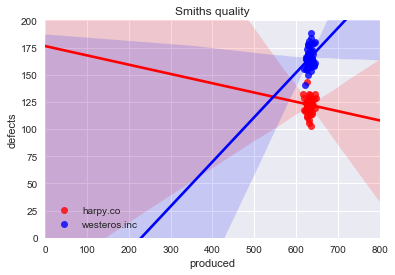

In [22]:
x = df_unsullen_id.sum()['produced']
y = df_unsullen_id.sum()['defects']

plt.title('Smiths quality')
plt.legend();
plt.xlim([0, 800])
plt.ylim([0, 200])
ax = sns.regplot(x=x[:51], y=y[:51], color="r", label=HARPY)
ax = sns.regplot(x=x[51:], y=y[51:], color="b", label=WESTR)
ax.legend(loc="best")
plt.show()